In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# load dataset
df = pd.read_csv("base/heart.csv")
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


Célula para corrigir os valores de zero

In [21]:
# Colunas com valores de zero que são clinicamente impossíveis
cols_to_correct = ["RestingBP", "Cholesterol"]

# Substituir 0 por NaN (Not a Number) para que possamos calcular a mediana corretamente
for col in cols_to_correct:
    df[col] = df[col].replace(0, np.nan)

# Calcular a mediana de cada coluna (ignorando os NaN) e preencher os valores faltantes
for col in cols_to_correct:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Verificar se ainda existem valores nulos ou zeros nessas colunas
print("Valores nulos após a correção:")
print(df[cols_to_correct].isnull().sum())
print("\nNovas estatísticas descritivas:")
print(df[cols_to_correct].describe())

Valores nulos após a correção:
RestingBP      0
Cholesterol    0
dtype: int64

Novas estatísticas descritivas:
        RestingBP  Cholesterol
count  918.000000   918.000000
mean   132.538126   243.204793
std     17.990127    53.401297
min     80.000000    85.000000
25%    120.000000   214.000000
50%    130.000000   237.000000
75%    140.000000   267.000000
max    200.000000   603.000000


### Explorar os dados (EDA - Análise Exploratória)

In [22]:
df.head()
# Checar valores ausentes
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Estatísticas Descritivas:

In [23]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.538126,243.204793,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.990127,53.401297,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [24]:
# Checar valores ausentes
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Histogramas

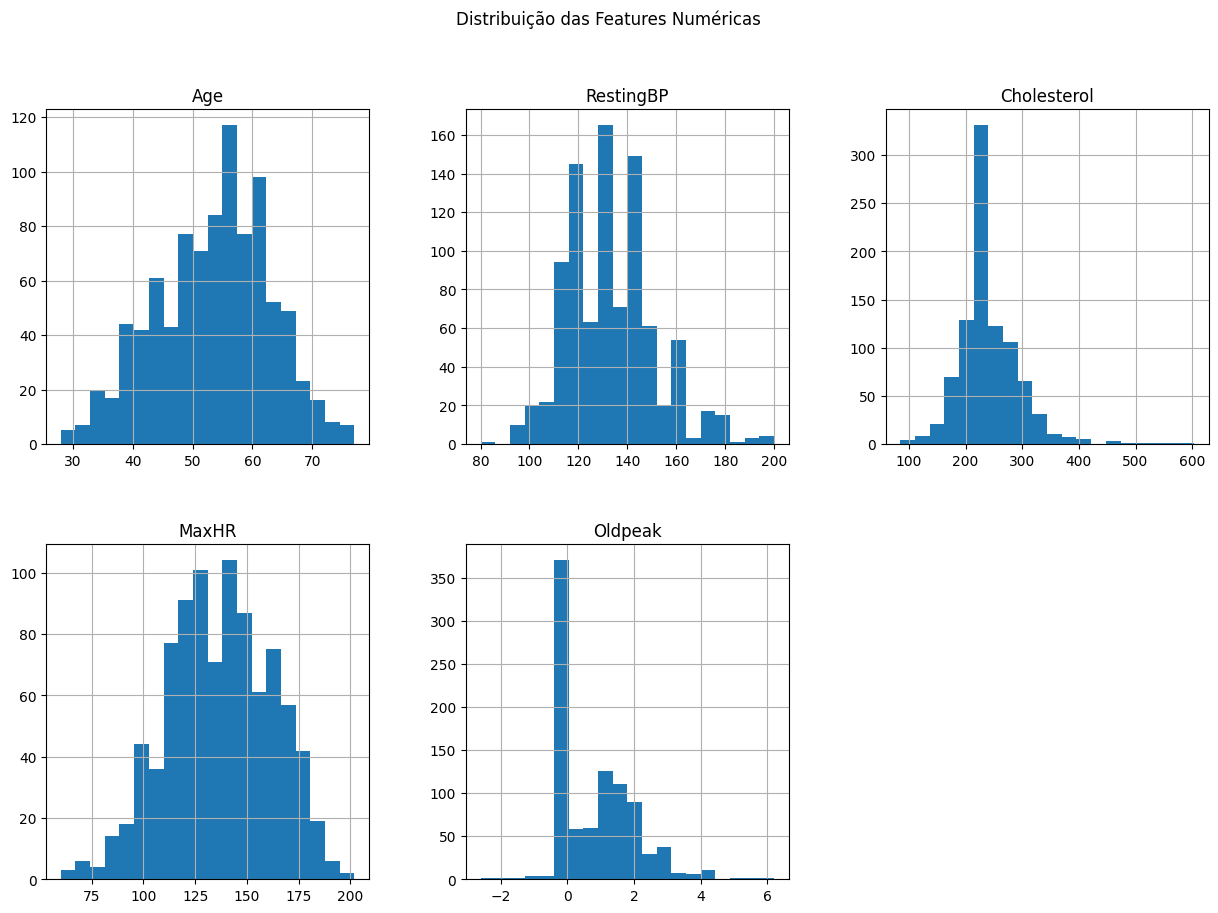

In [25]:
# Seleciona as colunas que parecem ser numéricas
numerical_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Cria um histograma para cada feature numérica
df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(2, 3))
plt.suptitle("Distribuição das Features Numéricas")
plt.show()

Visualização de Features Categóricas (Gráficos de Contagem)

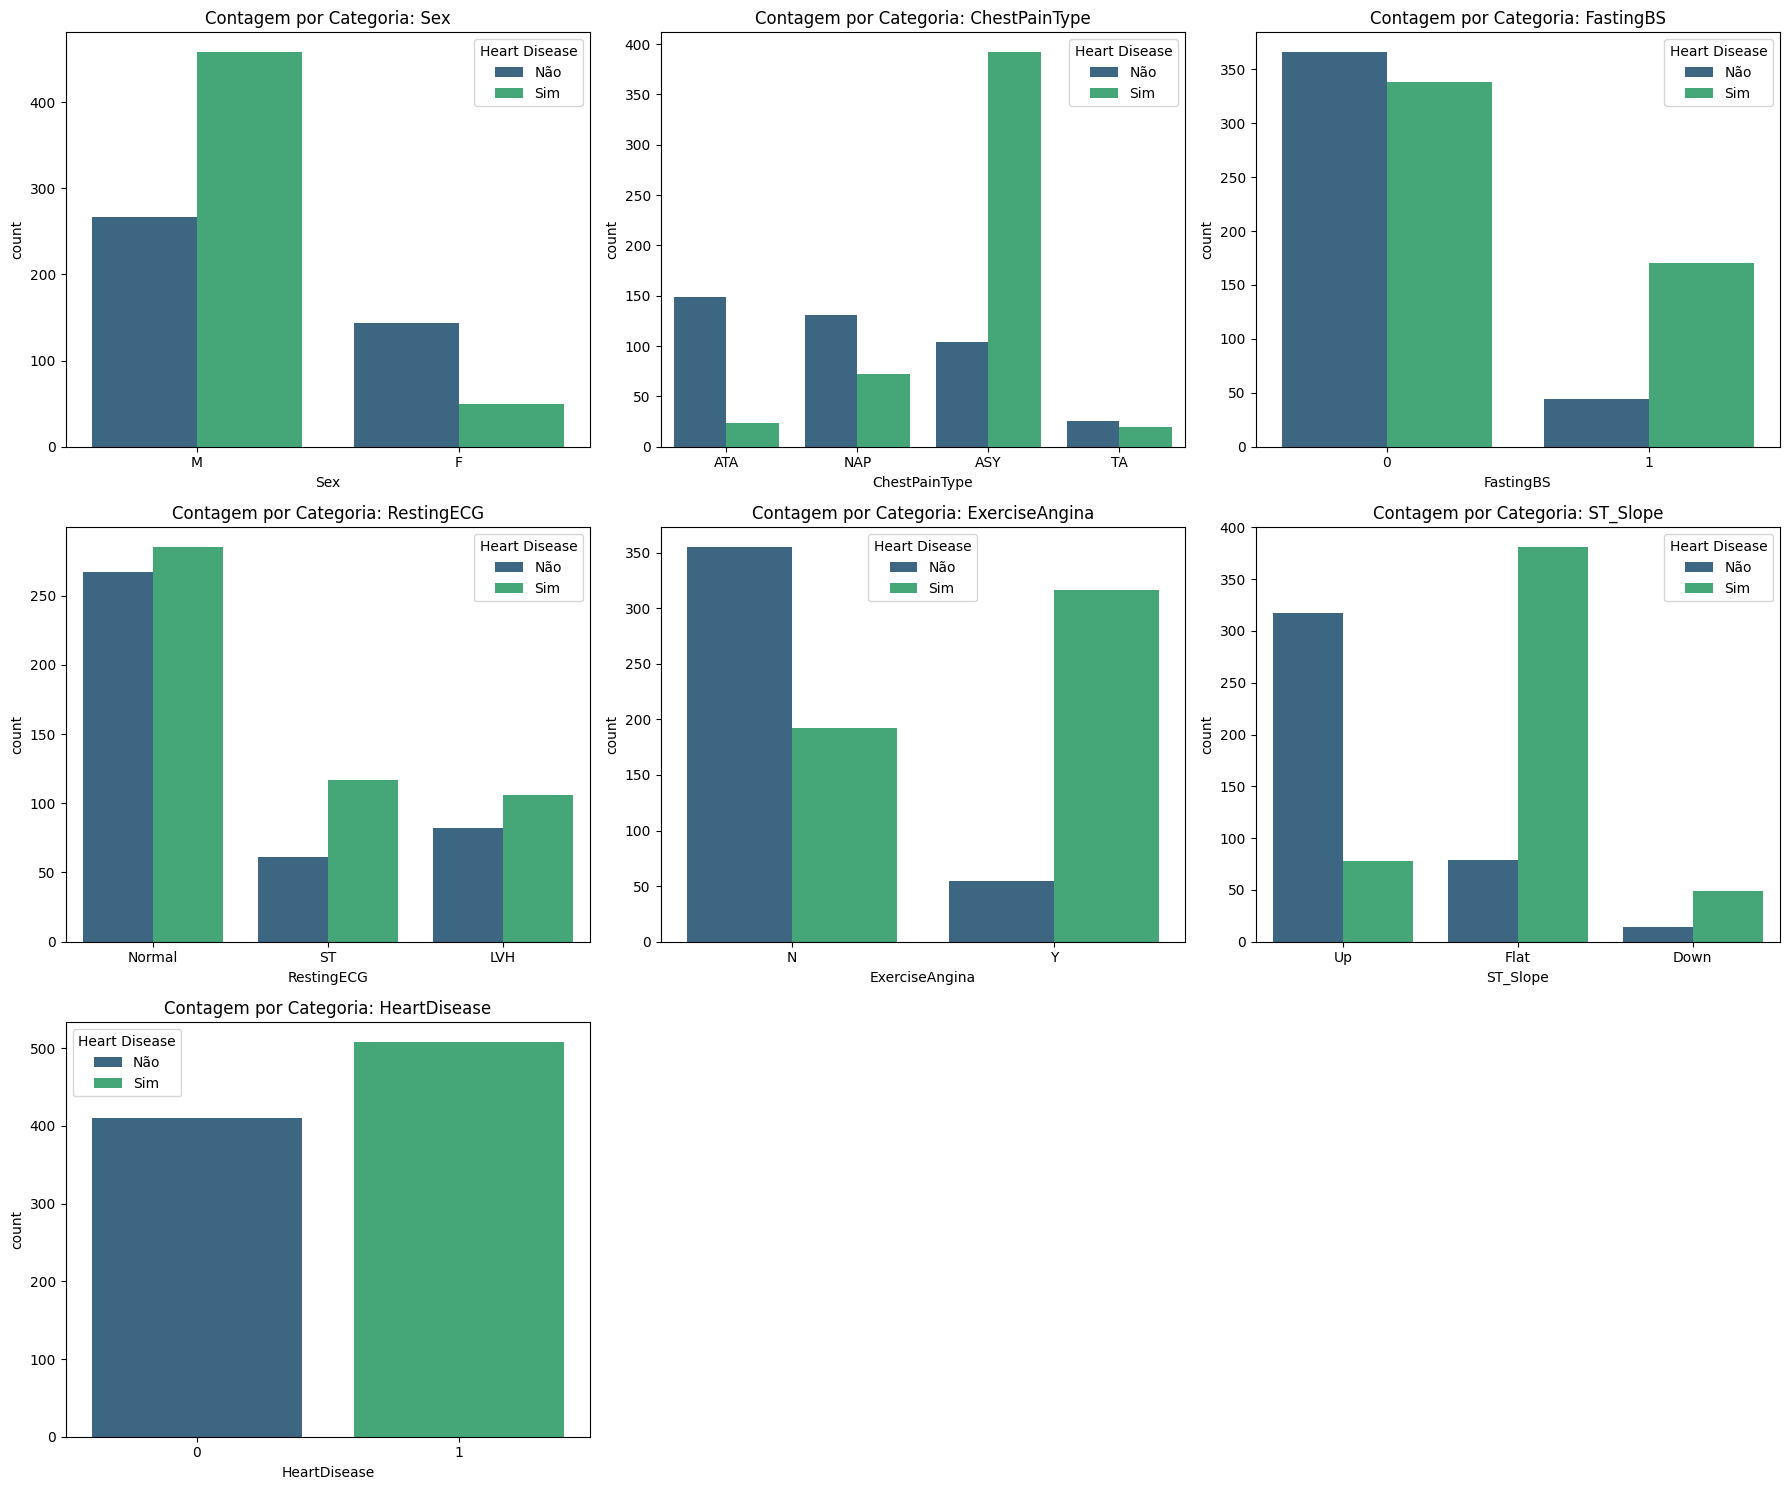

In [26]:
# Seleciona as colunas que parecem ser categóricas (incluindo a variável alvo para análise)
categorical_features = [
    "Sex",
    "ChestPainType",
    "FastingBS",
    "RestingECG",
    "ExerciseAngina",
    "ST_Slope",
    "HeartDisease",
]

# Cria um gráfico de contagem para cada feature categórica
plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)  # Cria uma grade de plots
    sns.countplot(x=feature, data=df, hue="HeartDisease", palette="viridis")
    plt.title(f"Contagem por Categoria: {feature}")
    plt.legend(title="Heart Disease", labels=["Não", "Sim"])

plt.tight_layout()
plt.show()

<Axes: >

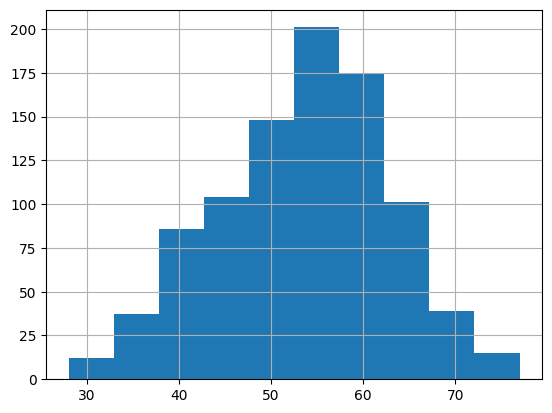

In [27]:
df["Age"].hist()

<Axes: xlabel='Sex', ylabel='count'>

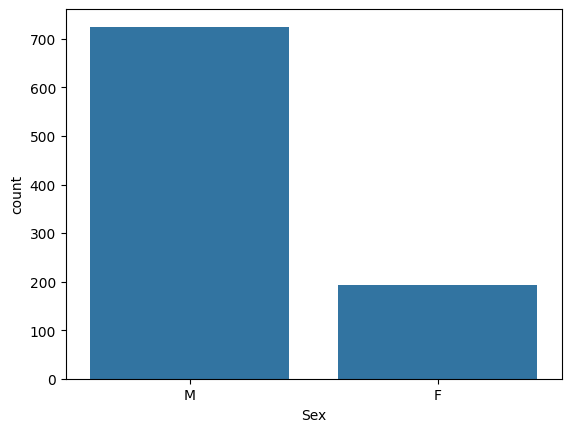

In [28]:
sns.countplot(x="Sex", data=df)

Etapa 1: Aplicar o One-Hot Encoding

In [29]:
# Primeiro, identificamos as colunas que são realmente categóricas
# Note que não incluímos a variável alvo 'HeartDisease'
categorical_features = [
    "Sex",
    "ChestPainType",
    "FastingBS",
    "RestingECG",
    "ExerciseAngina",
    "ST_Slope",
]

# Usamos pd.get_dummies para criar as novas colunas
# drop_first=True: Remove a primeira categoria de cada feature. Isso evita redundância (multicolinearidade).
# dtype=int: Cria as novas colunas com 0s e 1s em vez de True/False.
df_encoded = pd.get_dummies(
    df, columns=categorical_features, drop_first=True, dtype=int
)

# Vamos ver como ficou o novo DataFrame com as colunas transformadas
print("Colunas do DataFrame após o One-Hot Encoding:")
print(df_encoded.columns)
print("\nPrimeiras linhas do novo DataFrame:")
print(df_encoded.head())

Colunas do DataFrame após o One-Hot Encoding:
Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'FastingBS_1', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

Primeiras linhas do novo DataFrame:
   Age  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease  Sex_M  \
0   40      140.0        289.0    172      0.0             0      1   
1   49      160.0        180.0    156      1.0             1      0   
2   37      130.0        283.0     98      0.0             0      1   
3   48      138.0        214.0    108      1.5             1      0   
4   54      150.0        195.0    122      0.0             0      1   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  FastingBS_1  \
0                  1                  0                 0            0   
1                  0                  1     

Etapa 2: Nova Seleção de Recursos e Divisão
Seleção de recurso

- Variáveis independentes (features):
São as colunas que você usa como base para prever a target.

- Variável dependente (target):
A variável que você quer prever — neste caso, se a pessoa tem ou não doença cardíaca

In [30]:
# Agora, separamos X e y a partir deste NOVO DataFrame codificado
X = df_encoded.drop("HeartDisease", axis=1)  # remove a coluna target, fica só com as features
y = df_encoded["HeartDisease"]  # pega só a coluna target para prever

# O restante do processo continua igual!
# Dividimos os novos X e y em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=16
)

# Aplicamos a padronização
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test), columns=X_test.columns, index=X_test.index
)

## Desenvolvimento e previsão de modelos

In [31]:
# instancia o modelo (usando os parâmetros padrão)
logreg = LogisticRegression(random_state=16, max_iter=1000)

# ajuste o modelo com dados
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

Análise dos Coeficientes do Modelo (Explicabilidade):
A Regressão Logística permite ver quais features mais influenciaram a previsão.

In [32]:
# Cria um DataFrame com os nomes das features e seus coeficientes
coefficients = pd.DataFrame(logreg.coef_[0], X.columns, columns=["Coefficient"])

# Ordena os coeficientes para ver os mais importantes (positiva ou negativamente)
print("Features mais importantes para o modelo:")
print(coefficients.sort_values("Coefficient", ascending=False))

Features mais importantes para o modelo:
                   Coefficient
Sex_M                 0.731768
ST_Slope_Flat         0.710453
ExerciseAngina_Y      0.594492
FastingBS_1           0.592238
Oldpeak               0.341896
Age                   0.183042
Cholesterol           0.006155
RestingBP            -0.077924
RestingECG_ST        -0.079586
RestingECG_Normal    -0.081778
MaxHR                -0.253391
ChestPainType_TA     -0.256809
ST_Slope_Up          -0.444204
ChestPainType_NAP    -0.678349
ChestPainType_ATA    -0.798643


In [33]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 86,  22],
       [ 13, 109]])

Text(0.5, 427.9555555555555, 'Predicted label')

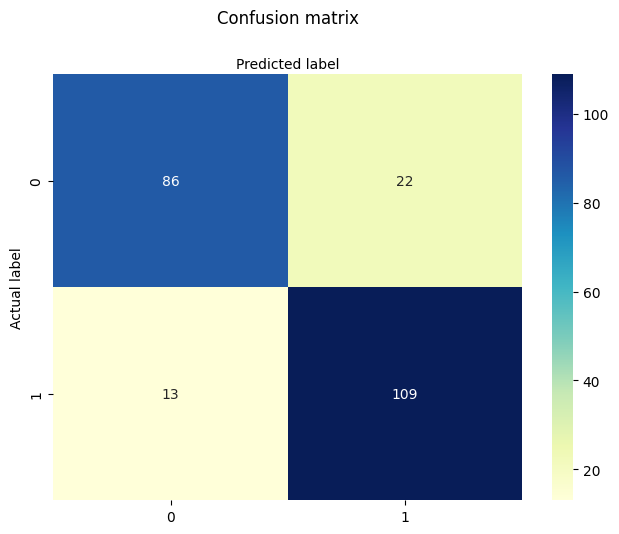

In [34]:
class_names = [0, 1]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

## Métricas de avaliação da matriz de confusão

In [35]:
target_names = ["Without HeartDisease", "With HeartDisease"]
print(classification_report(y_test, y_pred, target_names=target_names))

                      precision    recall  f1-score   support

Without HeartDisease       0.87      0.80      0.83       108
   With HeartDisease       0.83      0.89      0.86       122

            accuracy                           0.85       230
           macro avg       0.85      0.84      0.85       230
        weighted avg       0.85      0.85      0.85       230



Curva ROC
A curva ROC (Receiver Operating Characteristic, característica operacional do receptor) é um gráfico da taxa de verdadeiros positivos em relação à taxa de falsos positivos. Ele mostra a troca entre sensibilidade e especificidade.

A pontuação AUC para o caso é de 0,89. A pontuação AUC 1 representa um classificador perfeito, e 0,5 representa um classificador inútil.

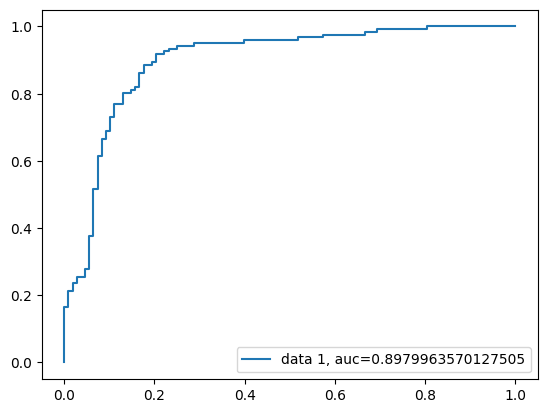

In [36]:
y_pred_proba = logreg.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()